<a href="https://colab.research.google.com/github/arjuna2112/TMDL2025/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
import pandas as pd

# Upload bestand
#uploaded = files.upload()

# Laad het CSV-bestand in een DataFrame
#df = pd.read_csv(io.BytesIO(uploaded['studentperformancelargedataset (1).csv']))
df = pd.read_csv('studentperformancelargedataset.csv')

# Bekijk de eerste paar regels van de DataFrame
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [ ]:
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [ ]:
df.info()
print(df.isna().sum())

unique_values1 = df["Gender"].value_counts()
unique_values2 = df["Participation_in_Discussions"].value_counts()
unique_values3 = df["Use_of_Educational_Tech"].value_counts()
unique_values4 = df["Self_Reported_Stress_Level"].value_counts()
unique_values5 = df["Preferred_Learning_Style"].value_counts()

print(unique_values1)
print(unique_values2)
print(unique_values3)
print(unique_values4)
print(unique_values5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [ ]:
df=df[df["Gender"]!="Other"]
df["Gender"] = df["Gender"].map({'Male': 0, 'Female': 1})
df["Gender"] = df["Gender"].fillna(-1).astype(int)
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].map({'Yes': 1, 'No': 0})
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].fillna(-1).astype(int)
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].map({'Yes': 1, 'No': 0})
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].fillna(-1).astype(int)
df["Low_Stress_Level"] = df["Self_Reported_Stress_Level"].map({'Low': 1, 'Medium': 0, 'High': 0})
df["Medium_Stress_Level"] = df["Self_Reported_Stress_Level"].map({'Low': 0, 'Medium': 1, 'High': 0})
df["High_Stress_Level"] = df["Self_Reported_Stress_Level"].map({'Low': 0, 'Medium': 0, 'High': 1})
df["Visual_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 0, 'Auditory': 0, 'Visual': 1})
df["Kinesthetic_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 1, 'Reading/Writing': 0, 'Auditory': 0, 'Visual': 0})
df["Auditory_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 0, 'Auditory': 1, 'Visual': 0})
df["Reading_Writing_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 1, 'Auditory': 0, 'Visual': 0})

<ipython-input-7-6bfe6dd37eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].map({'Male': 0, 'Female': 1})
<ipython-input-7-6bfe6dd37eb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].fillna(-1).astype(int)
<ipython-input-7-6bfe6dd37eb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
df['Student_ID'] = df['Student_ID'].str.lstrip('S').astype(int)
df.head()

<ipython-input-8-7771955e84b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Student_ID'] = df['Student_ID'].str.lstrip('S').astype(int)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),...,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Low_Stress_Level,Medium_Stress_Level,High_Stress_Level,Visual_Learning_Style,Kinesthetic_Learning_Style,Auditory_Learning_Style,Reading_Writing_Learning_Style
0,1,18,1,48,Kinesthetic,14,1,100,69,66,...,9,8,C,0,0,1,0,1,0,0
1,2,29,1,30,Reading/Writing,20,0,71,40,57,...,28,8,D,0,1,0,0,0,0,1
2,3,20,1,47,Kinesthetic,11,0,60,43,79,...,13,7,D,1,0,0,0,1,0,0
3,4,23,1,13,Auditory,0,1,63,70,60,...,24,10,B,1,0,0,0,0,1,0
4,5,19,1,24,Auditory,19,1,59,63,93,...,26,8,C,0,1,0,0,0,1,0


In [ ]:
df.corr(numeric_only=True)

,Student_ID,Age,Gender,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Low_Stress_Level,Medium_Stress_Level,High_Stress_Level,Visual_Learning_Style,Kinesthetic_Learning_Style,Auditory_Learning_Style,Reading_Writing_Learning_Style
Student_ID,1.000000,-0.014874,0.016571,-0.007996,-0.004700,0.013277,0.009079,0.004964,0.004028,0.002959,-0.003130,-0.004759,-0.008663,0.013969,-0.007571,-0.004308,-0.002316,-0.002883,0.009493
Age,-0.014874,1.000000,0.001776,-0.001713,-0.004358,0.005016,-0.008081,0.000804,-0.015085,-0.010938,0.012824,0.011971,-0.002220,0.003205,-0.001471,-0.015913,0.002812,0.002572,0.010587
Gender,0.016571,0.001776,1.000000,0.009167,-0.005834,0.000884,0.006563,0.001036,-0.016488,-0.012456,0.013624,0.003128,-0.002296,0.000134,0.002455,-0.004024,0.014508,-0.005815,-0.004713
Study_Hours_per_Week,-0.007996,-0.001713,0.009167,1.000000,0.027937,0.012340,0.003260,0.000071,0.007007,0.004824,0.010125,0.009608,0.010866,-0.020962,0.013800,-0.017813,0.010954,-0.006877,0.013716
Online_Courses_Completed,-0.004700,-0.004358,-0.005834,0.027937,1.000000,-0.014780,0.001074,0.000012,0.005251,0.005373,0.000720,-0.007537,0.007243,-0.006894,0.000347,-0.015875,-0.009652,0.012896,0.012781
Participation_in_Discussions,0.013277,0.005016,0.000884,0.012340,-0.014780,1.000000,-0.000734,-0.000803,-0.009617,-0.015259,-0.003283,0.005983,0.008217,-0.007030,-0.000596,-0.002332,0.019253,0.010431,-0.027263
Assignment_Completion_Rate (%),0.009079,-0.008081,0.006563,0.003260,0.001074,-0.000734,1.000000,0.009440,-0.000451,-0.006969,0.010045,0.008915,0.005572,-0.001281,-0.004763,0.011950,0.007877,-0.016259,-0.003737
Exam_Score (%),0.004964,0.000804,0.001036,0.000071,0.000012,-0.000803,0.009440,1.000000,0.002141,-0.009218,0.000782,-0.015894,-0.001137,-0.015887,0.021164,-0.000450,0.005736,0.010774,-0.015968
Attendance_Rate (%),0.004028,-0.015085,-0.016488,0.007007,0.005251,-0.009617,-0.000451,0.002141,1.000000,0.008783,-0.014582,-0.005650,0.003718,-0.006714,0.004148,-0.013318,-0.001328,0.007983,0.006762
Use_of_Educational_Tech,0.002959,-0.010938,-0.012456,0.004824,0.005373,-0.015259,-0.006969,-0.009218,0.008783,1.000000,0.009324,0.002943,-0.009235,0.005220,0.004021,-0.006694,-0.002763,-0.002699,0.012149


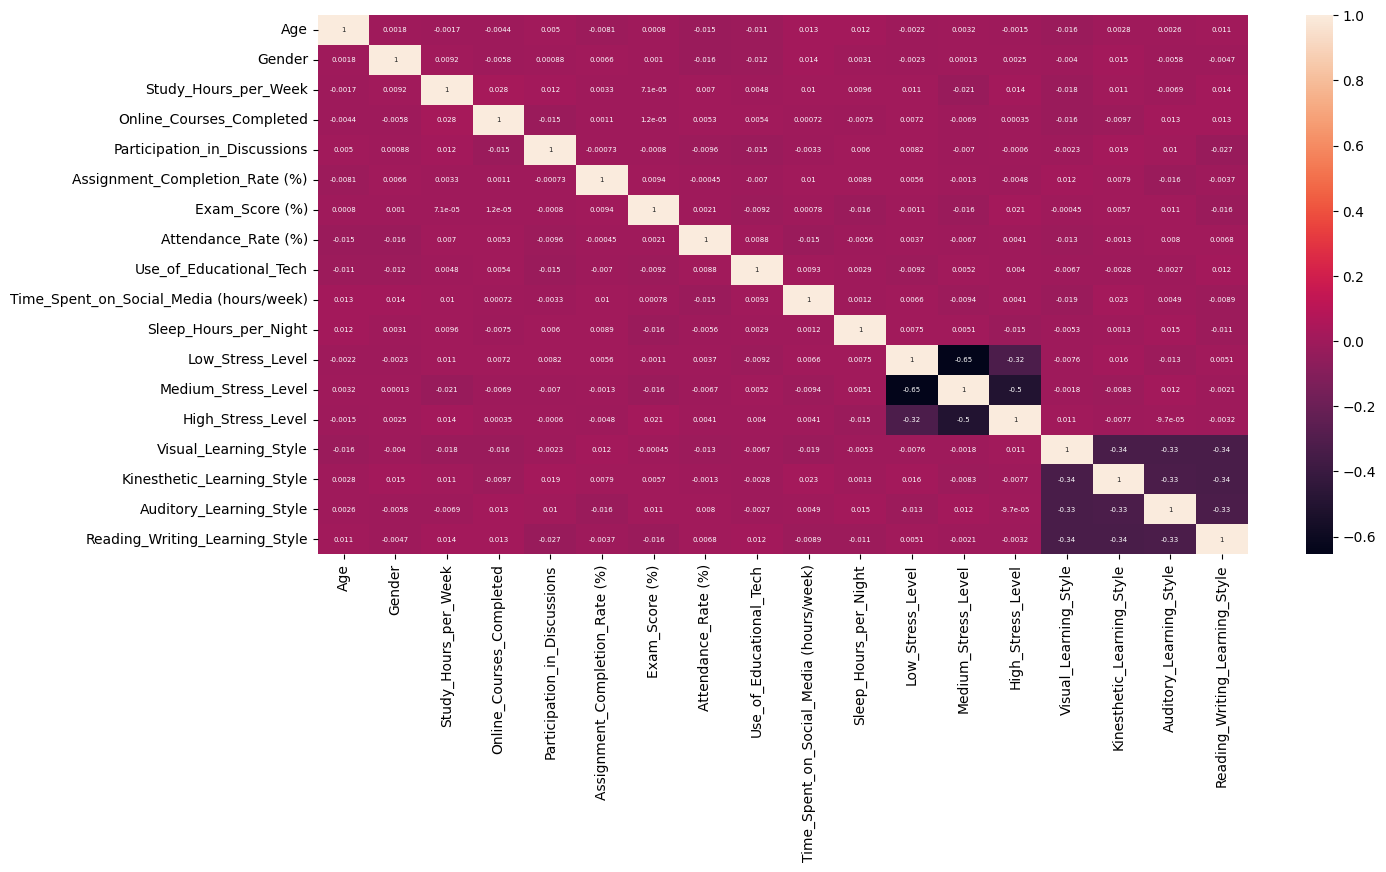

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.drop(columns="Student_ID").corr(numeric_only=True)
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, annot_kws={"size": 5})
plt.show()

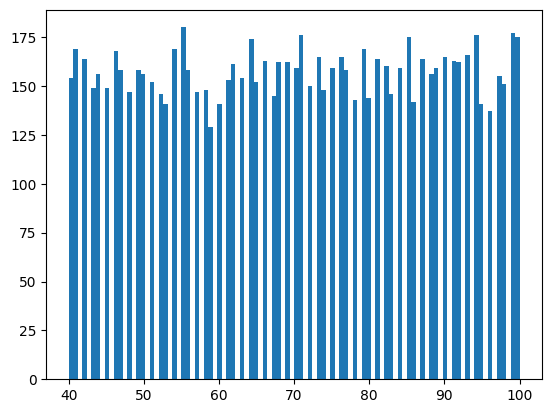

In [ ]:
plt.hist(df["Exam_Score (%)"], bins=100)
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
# get common libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# X (input variabeles)
X = df[["Age", "Gender", "Study_Hours_per_Week", "Online_Courses_Completed", "Participation_in_Discussions", "Assignment_Completion_Rate (%)", "Exam_Score (%)", "Attendance_Rate (%)", "Use_of_Educational_Tech", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]]

# Y (output)
Y = df["Exam_Score (%)"]

def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = (X[:n_train], Y[:n_train]), (X[n_train:], Y[n_train:])
    return train_X, train_y, test_X, test_y

n_train, n_test = 4797, 4797

train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

In [ ]:
train_X.shape

(4797, 11)

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RFC

train_acc_mean, train_acc_std = np.zeros((10, 8)), np.zeros((10, 8)) # storing it in an np array instead of a list makes it easier
test_acc_mean, test_acc_std = np.zeros((10, 8)), np.zeros((10,8))

n_trees = list(range(10, 101, 10))
depths = [1,3,5,7,9,11,13,15]

for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []
        for n in range(1, 6):
            # init new model
            modelDT = tree.DecisionTreeClassifier(max_depth=d)
            # train model
            modelDT = modelDT.fit(train_X, train_y)
            # store interem values
            train_perfs.append(modelDT.score(train_X, train_y))
            test_perfs.append(modelDT.score(test_X, test_y))
        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


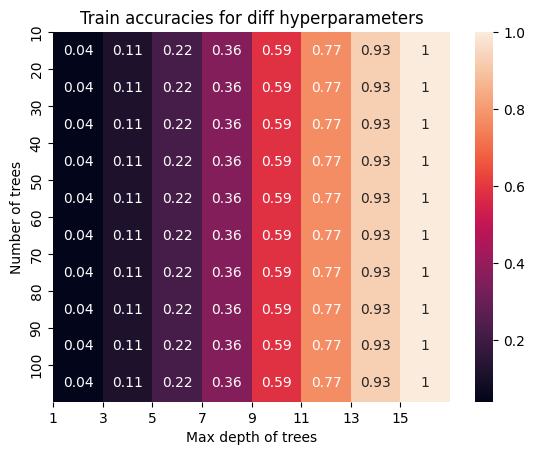

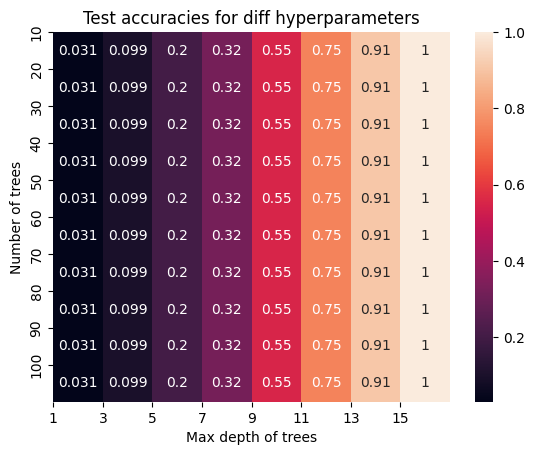

In [ ]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_mean, annot=True) # create seaborn heatmap with annotations
# add proper xticklabels and yticklabels
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
# add a title
plt.title("Train accuracies for diff hyperparameters")
plt.show()

# Figure 2
plt.figure()
# create seaborn heatmap with annotations
sns.heatmap(test_acc_mean, annot=True)
# add proper xticklabels and yticklabels
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
# add a title
plt.title("Test accuracies for diff hyperparameters")
plt.show()

In [ ]:
from sklearn import tree

train_acc_mean, train_acc_std = [], [] # to store the training accuracies
test_acc_mean, test_acc_std = [], []   # to store the testing accuracies

for d in tqdm(range(1, 16)): # loop over tree depths
    train_perfs = [] # store interem train scores
    test_perfs = []  # store interem test scores
    for n in range(1, 11):   # loop over random initializations
        # init new model
        modelDT = tree.DecisionTreeClassifier(max_depth=d)
        # train model
        modelDT = modelDT.fit(train_X, train_y)
        # store interem values
        train_perfs.append(modelDT.score(train_X, train_y))
        test_perfs.append(modelDT.score(test_X, test_y))

    # append mean and std scores to appropriate lists
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))

100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


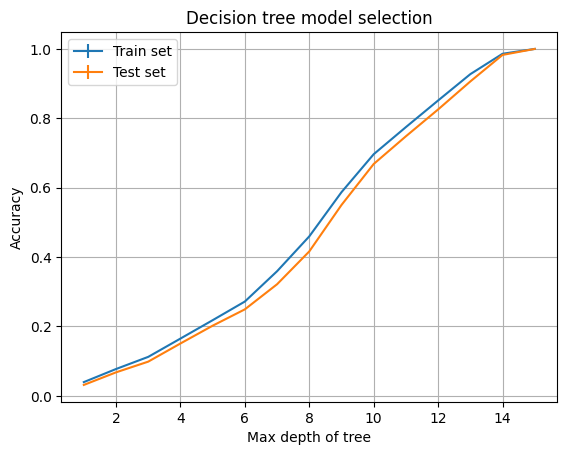

In [ ]:
plt.errorbar(x=np.arange(1,16), y=train_acc_mean, yerr=train_acc_std, label="Train set")
plt.errorbar(x=np.arange(1,16), y=test_acc_mean, yerr=test_acc_std, label="Test set")
plt.title("Decision tree model selection")
plt.ylabel("Accuracy")
plt.xlabel("Max depth of tree")
plt.legend()
plt.grid()
plt.show()